In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
try:
  df = pd.read_csv('portfolio_data.csv')
except FileNotFoundError:
  print("portfolio_data.csv not found. Creating a dummy dataframe for demonstration.")
  data = {'Date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']),
          'Open': [100, 102, 105, np.nan, 110],
          'High': [103, 105, 108, 107, 112],
          'Low': [98, 100, np.nan, 103, 108],
          'Close': [102, 104, 107, 106, 111],
          'Volume': [1000, 1200, 1500, 1300, np.nan]}
  df = pd.DataFrame(data)
# Display the first few rows
print("Original DataFrame:")
print(df.head())

# Data Cleaning

# 1. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 2. Handle missing values (imputation - fill with mean for numeric columns)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nDataFrame after handling missing values:")
print(df.head())

# 3. Remove duplicates
df.drop_duplicates(inplace=True)
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")
# Time Series Data Handling

# 1. Convert 'Date' column to datetime objects (if not already)
# Check if 'Date' column exists before proceeding
if 'Date' in df.columns:
  df['Date'] = pd.to_datetime(df['Date'])

  # 2. Set 'Date' as the index
  df.set_index('Date', inplace=True)

  print("\nDataFrame with 'Date' as index:")
  print(df.head())

# Time Series Pre-processing
# Check if 'Close' column exists before proceeding
if 'Close' in df.columns:
  # 1. Resampling (e.g., to monthly frequency)
  monthly_df = df.resample('M').mean()
  print("\nMonthly resampled data:")
  print(monthly_df.head())

  # 2. Rolling statistics (e.g., 3-day moving average of 'Close')
  df['Close_3day_MA'] = df['Close'].rolling(window=3).mean()
  print("\nDataFrame with 3-day moving average of 'Close':")
  print(df.head())

  # 3. Calculate returns (e.g., daily percentage change of 'Close')
  df['Daily_Return'] = df['Close'].pct_change()
  print("\nDataFrame with daily return:")
  print(df.head())

  # 4. Feature engineering, example Lagged features
  df['Close_Lag_1'] = df['Close'].shift(1)
  df['Close_Lag_2'] = df['Close'].shift(2)
  print("\nDataFrame with lagged close prices:")
  print(df.head())
else:
    print("'Close' column not found in DataFrame. Skipping time series pre-processing.")

Original DataFrame:
       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285

Missing values:
 Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

DataFrame after handling missing values:
       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285

Number of duplicated rows: 0

DataFrame with 'Date' as index:
                  AMZN        DPZ         BTC       NFLX
Date                                     

<ipython-input-5-bf796c8afe48>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...
2019-05-08,1917.770020,283.149994,6171.959961,364.369995
2019-05-09,1899.869995,282.160004,6358.290039,362.750000
2019-05-10,1889.979980,278.369995,7191.359863,361.040009


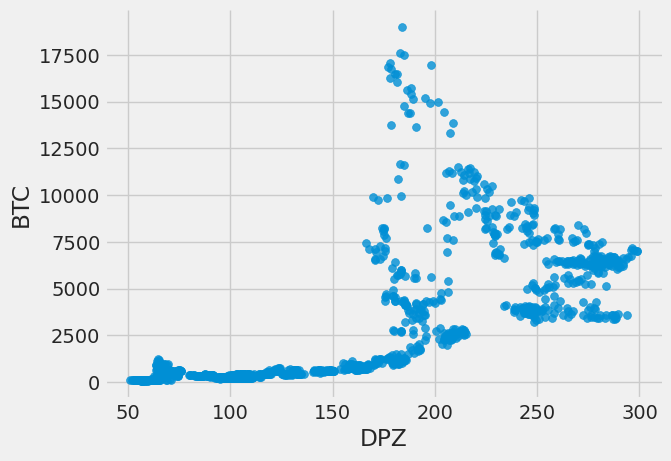

In [ ]:
# @title DPZ vs BTC

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='DPZ', y='BTC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

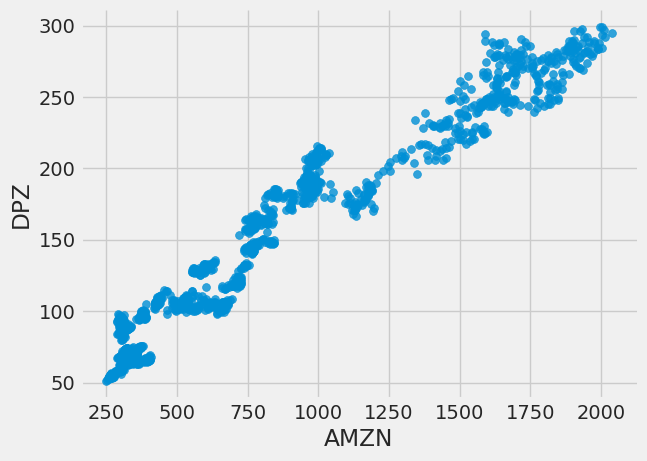

In [ ]:
# @title AMZN vs DPZ

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='AMZN', y='DPZ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

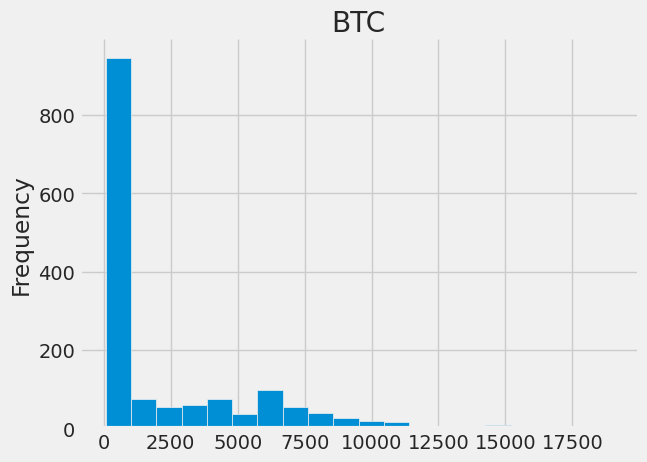

In [ ]:
# @title BTC

from matplotlib import pyplot as plt
df['BTC'].plot(kind='hist', bins=20, title='BTC')
plt.gca().spines[['top', 'right',]].set_visible(False)

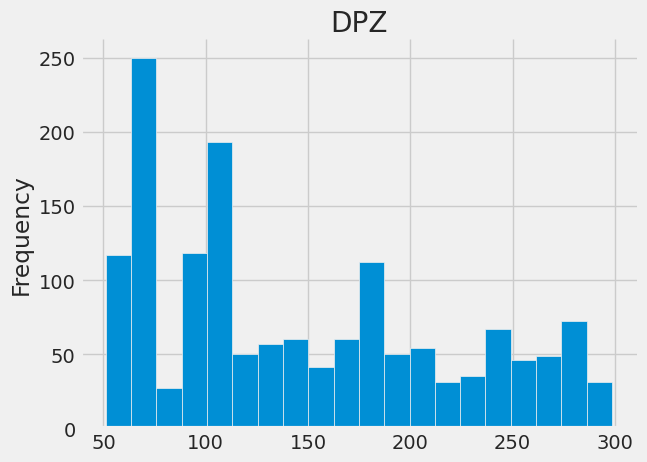

In [ ]:
# @title DPZ

from matplotlib import pyplot as plt
df['DPZ'].plot(kind='hist', bins=20, title='DPZ')
plt.gca().spines[['top', 'right',]].set_visible(False)

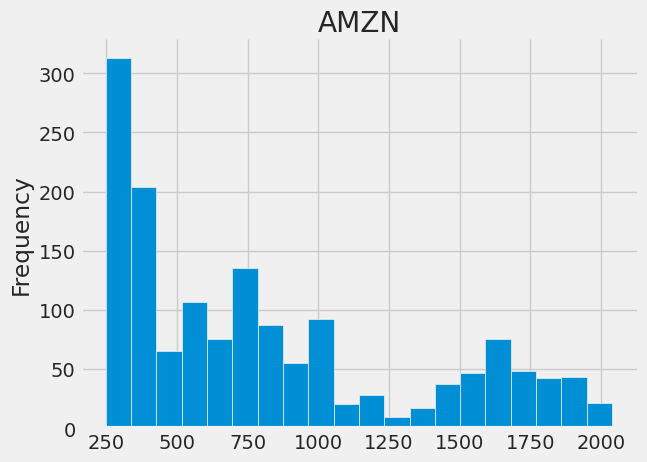

In [ ]:
# @title AMZN

from matplotlib import pyplot as plt
df['AMZN'].plot(kind='hist', bins=20, title='AMZN')
plt.gca().spines[['top', 'right',]].set_visible(False)

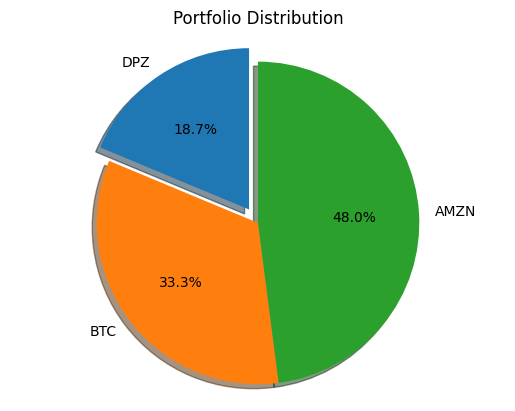

In [ ]:
# prompt: need a pie chart

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load the dataset
try:
  df = pd.read_csv('portfolio_data.csv')
except FileNotFoundError:
  data = {'Date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']),
          'Open': [100, 102, 105, np.nan, 110],
          'High': [103, 105, 108, 107, 112],
          'Low': [98, 100, np.nan, 103, 108],
          'Close': [102, 104, 107, 106, 111],
          'Volume': [1000, 1200, 1500, 1300, np.nan],
          'DPZ': [10, 12, 15, 13, 14], # Example data
          'BTC': [20, 22, 25, 23, 24], # Example data
          'AMZN': [30,32,35,33,34] #Example data
          }
  df = pd.DataFrame(data)

# ... (rest of your existing code)


# Example Pie Chart (replace with your actual data)

if 'DPZ' in df.columns and 'BTC' in df.columns and 'AMZN' in df.columns:
    # Create a pie chart
    labels = ['DPZ', 'BTC', 'AMZN']
    sizes = [df['DPZ'].sum(), df['BTC'].sum(), df['AMZN'].sum()]
    explode = (0.1, 0, 0)  # explode the 1st slice

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Portfolio Distribution")
    plt.show()
else:
  print("DPZ, BTC or AMZN column not found in DataFrame. Skipping Pie chart")


In [ ]:
df = pd.read_csv('portfolio_data.csv')

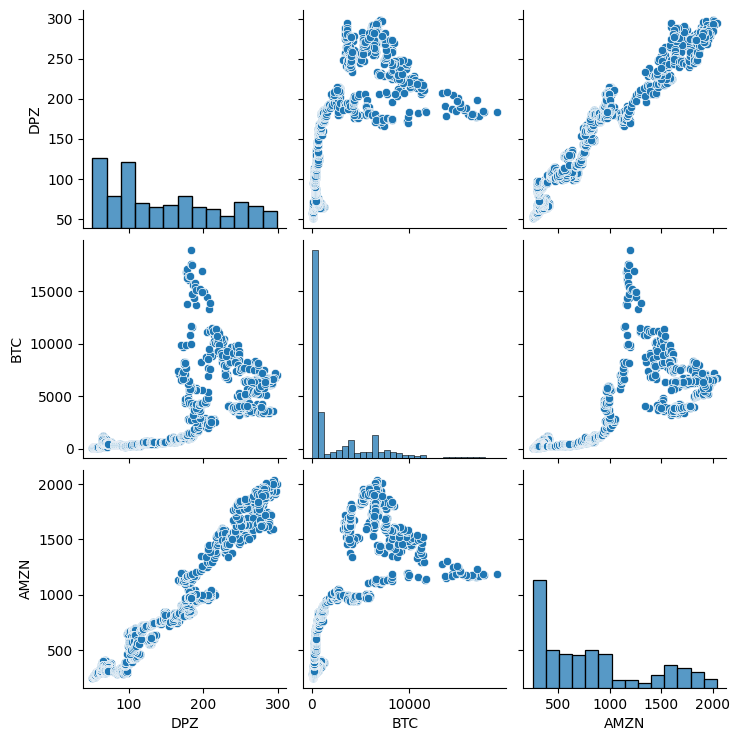

In [ ]:


import seaborn as sns

if 'DPZ' in df.columns and 'BTC' in df.columns and 'AMZN' in df.columns:
    sns.pairplot(df[['DPZ', 'BTC', 'AMZN']])
    plt.show()
else:
    print("DPZ, BTC, or AMZN column not found in DataFrame. Skipping pairplot.")
